In [111]:
import pandas as pd 
import numpy as np
import sklearn as skl
from sklearn.model_selection import train_test_split, cross_val_score
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler, FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from pandas import DataFrame
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [112]:
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [113]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [114]:
df.duplicated().sum()

0

- aucun doublon 

In [115]:
max_bedrooms = df.loc[df.bedrooms == df.bedrooms.max()]
max_bedrooms.id

15870    2402100895
Name: id, dtype: int64

In [116]:
df.sort_values(by='sqft_living', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
14556,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
18302,6072800246,20140702T000000,3300000.0,5,6.25,8020,21738,2.0,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [117]:
df.sort_values(by='price', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


### drop columns 

In [118]:

df = df.drop([7252,3914, 9254 ], axis=0)

In [119]:
df = df.drop(labels =15870, axis=0)


In [120]:
df.head()
df.drop(['long', 'lat'], axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


# encoder

In [121]:
from sklearn.preprocessing import OneHotEncoder 

# transformer = OneHotEncoder()
# features_zip = transformer.fit_transform(df[['zipcode']]).toarray()
# print(features_zip)

In [122]:
# features_labels = transformer.categories_
# print(features_labels)

In [1]:
# features_labels = np.array(features_labels).ravel()
# features_labels

In [124]:
# features_labels = features_labels.astype(str)
# print(features_labels)

In [125]:
# df[features_labels] = features_zip

In [126]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [127]:
def custom_pie_plot(series,title):
    labels = series.value_counts().index
    values = series.value_counts()

    values.plot.pie(autopct="%1.1f%%", pctdistance=0.7, figsize=(5,5), labels=None)
    plt.title(title, fontsize=15, color="white")
    plt.legend(labels, bbox_to_anchor=(0.01, 0.75),
            fontsize=12)

In [128]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# pairplot by price 

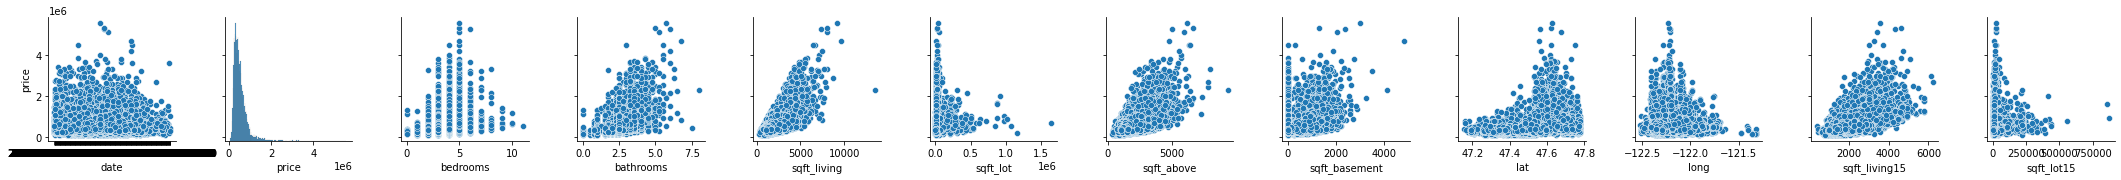

In [129]:
# df['sqft_living_log'] = np.log1p(df['sqft_living'])
sns.pairplot(df, x_vars = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] , y_vars=['price'])

# logarithm

In [130]:
# df[['sqft_living', 'sqft_above', 'sqft_living15']] = np.log1p(df[['sqft_living', 'sqft_above','sqft_living15']])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


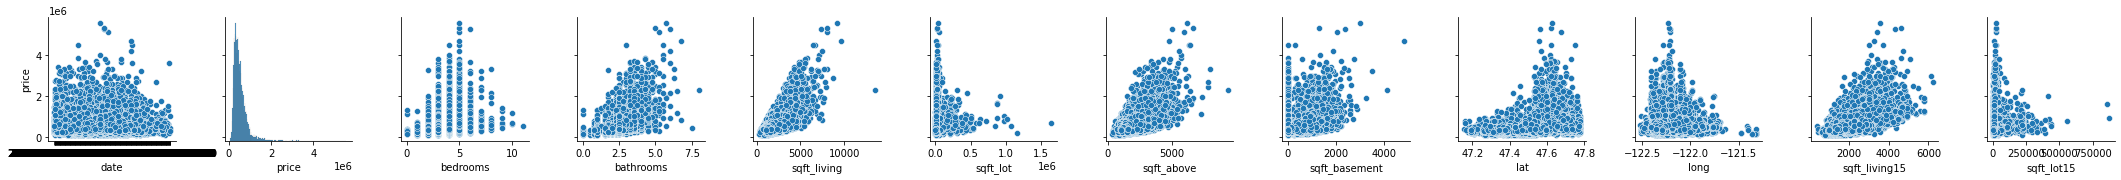

In [131]:
sns.pairplot(df, x_vars = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] , y_vars=['price'])
df.dropna()

## analyse des variables catégorielles 

- waterfront

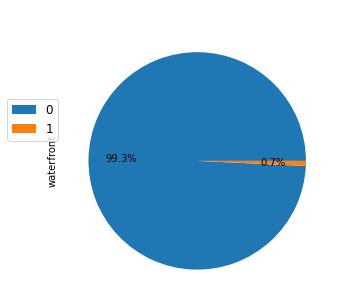

In [132]:
custom_pie_plot(df["waterfront"], "dristribution by waterfront")

feature négligeable car trop peu de oui 

## Pearson's R

corrélation

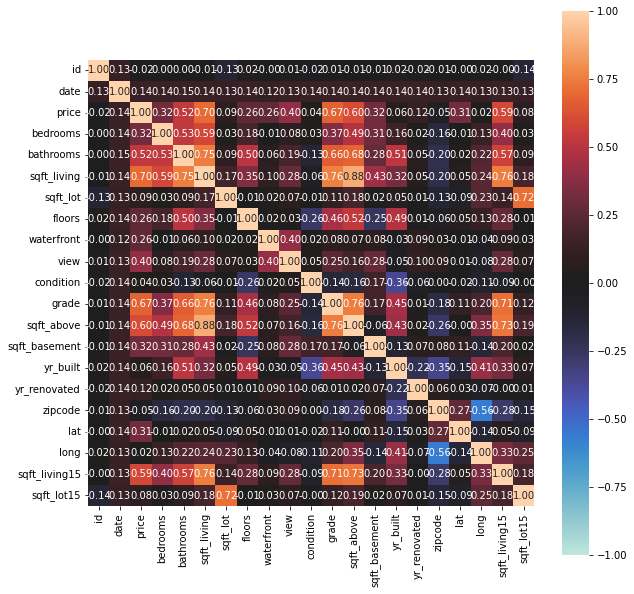

In [133]:
from dython.nominal import associations

# complete_correlation= associations(df.drop(features_labels, inplace=False, axis=1), filename= 'complete_correlation.png', figsize=(10,10), plot=False)
complete_correlation= associations( df, filename= 'complete_correlation.png', figsize=(10,10), plot=False)

In [1]:
mask = np.triu(np.ones_like(complete_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(complete_correlation['corr'], mask=mask, annot=True, fmt=".2f")
 

NameError: name 'np' is not defined

- price:  - 0.59 with sqft_living15
          - dont keep (sqft_lot, long, lat, zip_code, condition, sqft_lot, id, date)  

In [135]:
mask = (df['yr_renovated'] == 0)
df.loc[mask, 'yr_renovated'] = df.loc[mask, 'yr_built']

## make pipeline

In [136]:
zip = ['zipcode']
sqft = ['sqft_basement', 'sqft_above']
logfunc = FunctionTransformer(np.log1p)
pipe = make_pipeline(logfunc, PolynomialFeatures(2), StandardScaler())
standart = ['grade', 'view', 'waterfront', 'bedrooms','bathrooms', 'floors', 'condition']
preprocessing = make_column_transformer((OneHotEncoder(), zip),(StandardScaler(), standart),(pipe, sqft), remainder='passthrough')


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


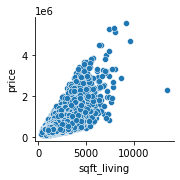

In [138]:
sns.pairplot(df, x_vars = ['sqft_living'] , y_vars=[ 'price'])


In [139]:
y = df.price
X = df.drop(['price','id','date','lat', 'long', 'sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_living', 'yr_built'], axis=1)
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode
0,3,1.00,1.0,0,0,3,7,1180,0,1955,98178
1,3,2.25,2.0,0,0,3,7,2170,400,1991,98125
2,2,1.00,1.0,0,0,3,6,770,0,1933,98028
3,4,3.00,1.0,0,0,5,7,1050,910,1965,98136
4,3,2.00,1.0,0,0,3,8,1680,0,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,0,3,8,1530,0,2009,98103
21609,4,2.50,2.0,0,0,3,8,2310,0,2014,98146
21610,2,0.75,2.0,0,0,3,7,1020,0,2009,98144
21611,3,2.50,2.0,0,0,3,8,1600,0,2004,98027


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [141]:
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode
0,3,1.00,1.0,0,0,3,7,1180,0,1955,98178
1,3,2.25,2.0,0,0,3,7,2170,400,1991,98125
2,2,1.00,1.0,0,0,3,6,770,0,1933,98028
3,4,3.00,1.0,0,0,5,7,1050,910,1965,98136
4,3,2.00,1.0,0,0,3,8,1680,0,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,0,3,8,1530,0,2009,98103
21609,4,2.50,2.0,0,0,3,8,2310,0,2014,98146
21610,2,0.75,2.0,0,0,3,7,1020,0,2009,98144
21611,3,2.50,2.0,0,0,3,8,1600,0,2004,98027


In [142]:
model = make_pipeline(preprocessing, LinearRegression())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('mae : ', mean_absolute_error(y_test, y_pred))
print('mse : ', mean_squared_error(y_test, y_pred))
print('score : ', model.score(X_test, y_test))


mae :  93775.54122789846
mse :  24140182983.565407
score :  0.8178725608530617


In [143]:
model.get_params(deep=True)

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(), ['zipcode']),
                                   ('standardscaler', StandardScaler(),
                                    ['grade', 'view', 'waterfront', 'bedrooms',
                                     'bathrooms', 'floors', 'condition']),
                                   ('pipeline',
                                    Pipeline(steps=[('functiontransformer',
                                                     FunctionTransformer(func=<ufunc 'log1p'>)),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['sqft_basement', 'sqft_above'])])),
  (